## Download kaggle data in Google Colab

Link oficial de dataset : https://data.mendeley.com/datasets/rscbjbr9sj/3

In [ ]:
# Peso (7.19 GB)
!kaggle datasets download -d anirudhcv/labeled-optical-coherence-tomography-oct

Dataset URL: https://www.kaggle.com/datasets/anirudhcv/labeled-optical-coherence-tomography-oct
License(s): unknown
100% 6.69G/6.70G [01:24<00:00, 106MB/s]
100% 6.70G/6.70G [01:24<00:00, 85.4MB/s]


In [ ]:
!unzip -q /content/labeled-optical-coherence-tomography-oct.zip -d /content
!rm /content/labeled-optical-coherence-tomography-oct.zip

## Import libraries

In [ ]:
import os
import random
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [ ]:
# Function to count images in each class directory
def count_images_in_subfolders(directory):
    class_counts = {}
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

In [ ]:
# Function to get a random image from each class directory
def get_random_image_from_class(directory, class_name):
    class_path = os.path.join(directory, class_name)
    image_file = random.choice(os.listdir(class_path))
    return os.path.join(class_path, image_file)

In [ ]:
# Function to plot images in a grid with x and y axis
def plot_images_with_axes(rows, cols, image_paths, title):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.set_title(image_paths[i].split('/')[-2])  # Display the class name

        # Show the pixel dimensions by displaying the x and y axes
        ax.set_xlabel(f"Width: {img.shape[1]} px")
        ax.set_ylabel(f"Height: {img.shape[0]} px")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
# Function to get all image dimensions from a directory
def get_image_dimensions_from_directory(directory):
    dimensions = []
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                with Image.open(image_path) as img:
                    dimensions.append(img.size)  # (width, height)
    return dimensions

## Explore data


In [ ]:
# Main Folder Path
folder_path = "/content/Dataset - train+val+test"

# Sub Folder Paths
train_dir = f"{folder_path}/train"
val_dir = f"{folder_path}/val"
test_dir = f"{folder_path}/test"

print(f"Organization in dataset {os.listdir(folder_path)}\n")
print(f"Train Directory: {os.listdir(train_dir)}")
print(f"Validation Directory: {os.listdir(test_dir)}")
print(f"Test Directory: {os.listdir(val_dir)}")

Organization in dataset ['train', 'val', 'test']

Train Directory: ['NORMAL', 'DRUSEN', 'DME', 'CNV']
Validation Directory: ['NORMAL', 'DRUSEN', 'DME', 'CNV']
Test Directory: ['NORMAL', 'DRUSEN', 'DME', 'CNV']


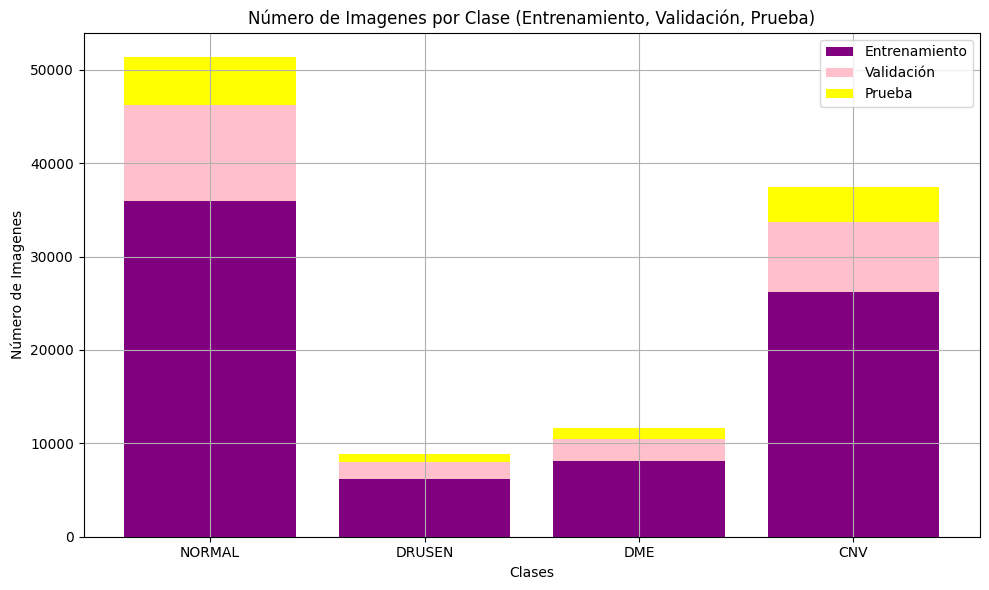

In [ ]:
# Get the counts for train, val, and test sets
train_counts = count_images_in_subfolders(train_dir)
val_counts = count_images_in_subfolders(val_dir)
test_counts = count_images_in_subfolders(test_dir)

# Ensure classes are in the same order
classes = list(train_counts.keys())
train_values = [train_counts[cls] for cls in classes]
val_values = [val_counts[cls] for cls in classes]
test_values = [test_counts[cls] for cls in classes]

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))

# Stacked bars for train, val, and test
plt.bar(classes, train_values, color='purple', label='Entrenamiento')
plt.bar(classes, val_values, bottom=train_values, color='pink', label='Validación')
plt.bar(classes, test_values, bottom=[i+j for i,j in zip(train_values, val_values)], color='yellow', label='Prueba')

# Add labels and title
plt.xlabel('Clases')
plt.ylabel('Número de Imagenes')
plt.title('Número de Imagenes por Clase (Entrenamiento, Validación, Prueba)')
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total counts for each subset
total_train = sum(train_counts.values())
total_val = sum(val_counts.values())
total_test = sum(test_counts.values())

# Calculate the overall total number of images
total_images = total_train + total_val + total_test

# Calculate the percentages
train_percentage = (total_train / total_images) * 100
val_percentage = (total_val / total_images) * 100
test_percentage = (total_test / total_images) * 100

# Print the results
print(f"Total number of images: {total_images}")
print(f"Train: {total_train} images, {train_percentage:.2f}% of the total dataset")
print(f"Validation: {total_val} images, {val_percentage:.2f}% of the total dataset")
print(f"Test: {total_test} images, {test_percentage:.2f}% of the total dataset")

Total number of images: 109309
Train: 76515 images, 70.00% of the total dataset
Validation: 21861 images, 20.00% of the total dataset
Test: 10933 images, 10.00% of the total dataset


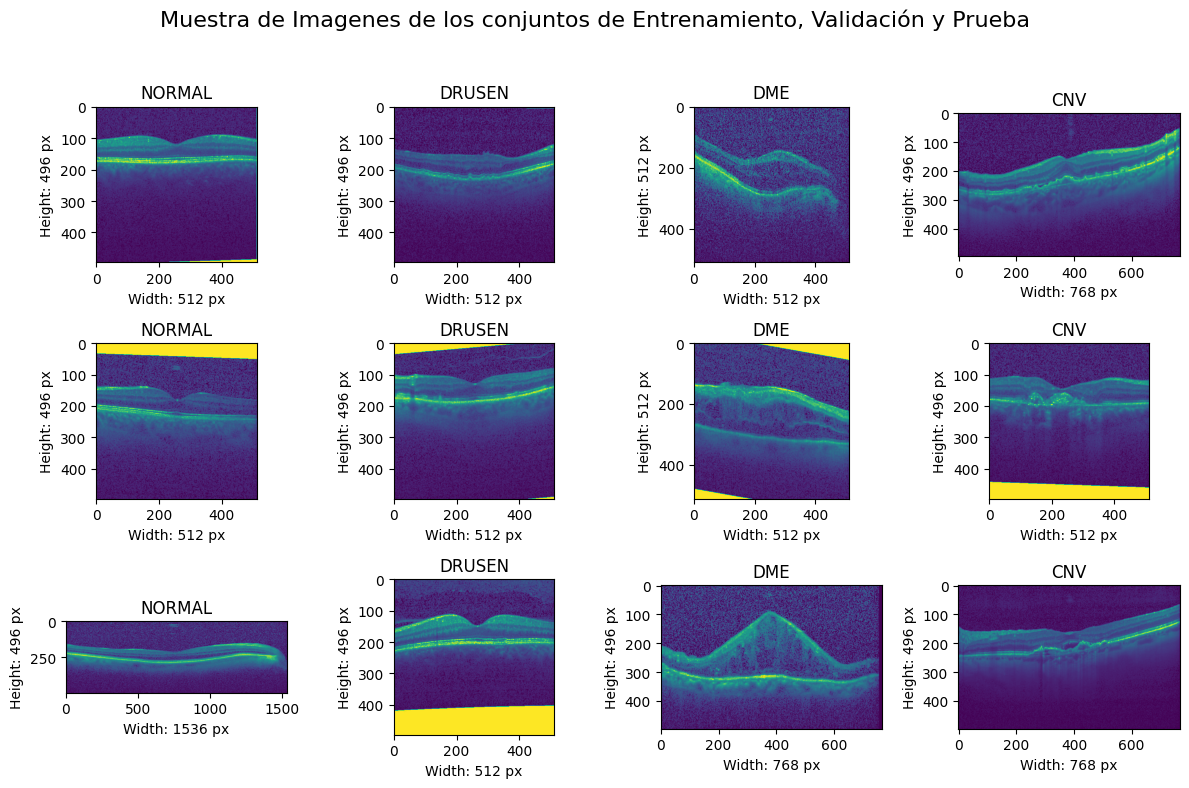

In [ ]:
# Get random images from each class for train, val, and test
classes = os.listdir(train_dir)  # Assuming same classes in all directories

# Get one image from each class in train, val, and test
train_images = [get_random_image_from_class(train_dir, cls) for cls in classes]
val_images = [get_random_image_from_class(val_dir, cls) for cls in classes]
test_images = [get_random_image_from_class(test_dir, cls) for cls in classes]

# Combine all images for plotting
all_images = train_images + val_images + test_images

# Plot the images in a grid (3 rows: train, val, test; 4 columns: one for each class)
plot_images_with_axes(3, 4, all_images, "Muestra de Imagenes de los conjuntos de Entrenamiento, Validación y Prueba")

In [ ]:
# Get dimensions for train, val, and test sets
train_dimensions = get_image_dimensions_from_directory(train_dir)
val_dimensions = get_image_dimensions_from_directory(val_dir)
test_dimensions = get_image_dimensions_from_directory(test_dir)

# Combine all dimensions into one list
all_dimensions = train_dimensions + val_dimensions + test_dimensions

# Find the minimum width and height across all images
min_width = min([dim[0] for dim in all_dimensions])
min_height = min([dim[1] for dim in all_dimensions])

# Print the minimum dimensions
print(f"The minimum width is: {min_width}px")
print(f"The minimum height is: {min_height}px")

The minimum width is: 384px
The minimum height is: 277px
You should resize all images to at least 384x277 pixels.
